In [ ]:
import numpy as np
import pandas as pd
import os
import pathlib
import glob
import matplotlib.pyplot as plt
import splitfolders
import tensorflow
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import itertools

2023-06-12 23:34:21.273192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
data_dir = "/Users/liang/Desktop/Computer Vision/Final_Project/archive/raw-img"
data_dir = pathlib.Path(data_dir)

In [ ]:
Total_Images = glob.glob('/Users/liang/Desktop/Computer Vision/Final_Project/archive/raw-img/*/*.jpeg')
print('Total Number of Images:',len(Total_Images))
Total_Images = pd.Series(Total_Images)

Total Number of Images: 24209


In [ ]:
df = pd.DataFrame()
df['FileName'] = Total_Images.map(lambda ImageName:ImageName.split("H")[-1])
df['ClassID'] = Total_Images.map(lambda ImageName:ImageName.split("/")[-2])

In [ ]:
classid_Total = df['ClassID'].value_counts()
classid_Total.head(10)

ClassID
dog          4863
spider       4497
chicken      3098
horse        2623
cow          1866
squirrel     1862
butterfly    1650
sheep        1444
cat          1227
elephant     1079
Name: count, dtype: int64

/var/folders/hs/v5wrwsp11s17ls2_6yx5ytkh0000gn/T/ipykernel_7551/3476361998.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10',num_count)


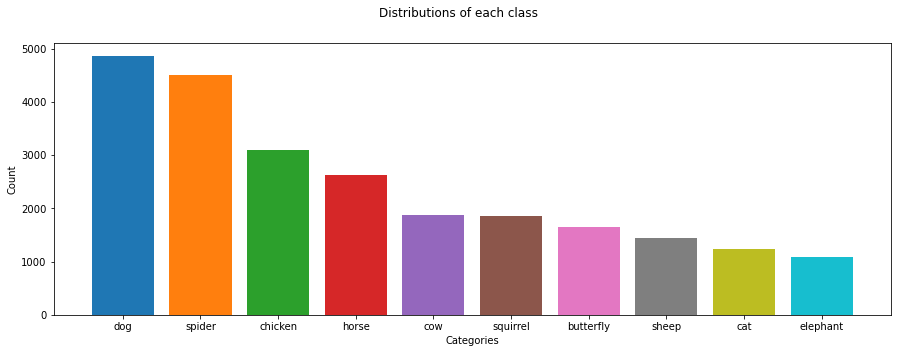

In [ ]:
count = df['ClassID'].value_counts()

plt.figure(figsize=(15,5))
num_count = len(count)
color_palette = plt.cm.get_cmap('tab10',num_count)
plt.bar(count.index,count.values,color=color_palette(np.arange(num_count)))
plt.xlabel('Categories')
plt.ylabel('Count')
plt.suptitle('Distributions of each class')
plt.show()

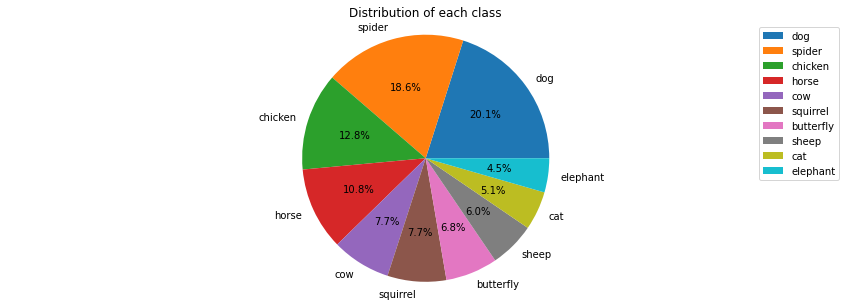

In [ ]:
plt.figure(figsize=(15,5))
plt.pie(count.values,labels=count.index,autopct='%1.1f%%')
plt.title('Distribution of each class')
plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

In [ ]:
train_path='./output/train/'
val_path='./output/val'
test_path='./output/test'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

In [ ]:
train_image1 = glob.glob('./output/train/*/*.jpeg')

Total_TrainImages = train_image1
print("Number of Training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./output/test/*/*.jpeg')

Total_TestImages = test_image1
print("Number of Test images: ", len(Total_TestImages))



Val_image1 = glob.glob('./output/val/*/*.jpeg')

Total_ValImages = Val_image1
print("Number of validation images: ", len(Total_ValImages))

Number of Training images:  19366
Number of Test images:  2447
Number of validation images:  2396


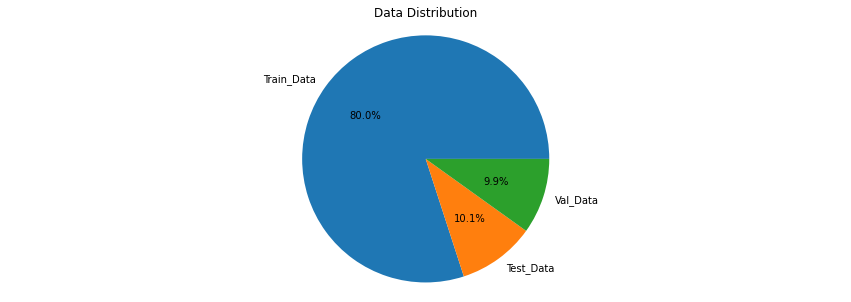

In [ ]:
count_x = [len(Total_TrainImages), len(Total_TestImages), len(Total_ValImages)]
names = ['Train_Data', 'Test_Data', 'Val_Data']
plt.figure(figsize=(15,5))
plt.pie(count_x,labels=names,autopct='%1.1f%%')
plt.title('Data Distribution')
plt.axis('equal')
plt.show()

In [ ]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
train_df['ClassID'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

,Filename,ClassID
0,1716.jpeg,cat
1,373.jpeg,cat
2,1653.jpeg,cat
3,1829.jpeg,cat
4,47.jpeg,cat


In [ ]:
distribution_of_train = train_df['ClassID'].value_counts()
distribution_of_train.head(10)

ClassID
dog          3890
spider       3600
chicken      2478
horse        2098
cow          1492
squirrel     1489
butterfly    1324
sheep        1155
cat           984
elephant      856
Name: count, dtype: int64

/var/folders/hs/v5wrwsp11s17ls2_6yx5ytkh0000gn/T/ipykernel_7551/2101441714.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10',num)


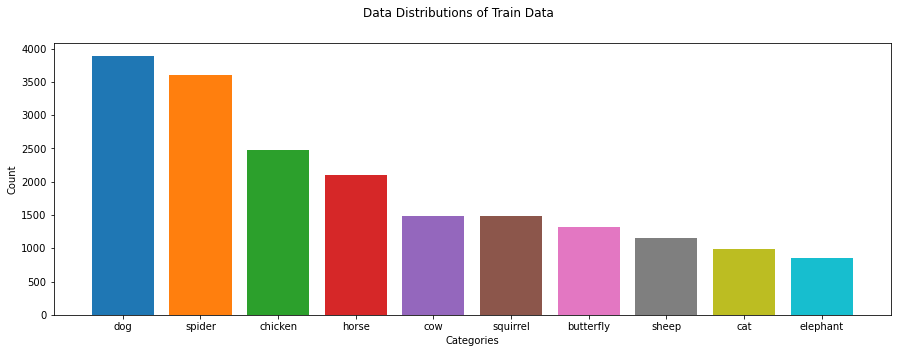

In [ ]:
plt.figure(figsize=(15,5))
num = len(distribution_of_train)
color_palette = plt.cm.get_cmap('tab10',num)
plt.bar(distribution_of_train.index,distribution_of_train.values,color=color_palette(np.arange(num)))
plt.xlabel('Categories')
plt.ylabel('Count')
plt.suptitle('Data Distributions of Train Data')
plt.show()

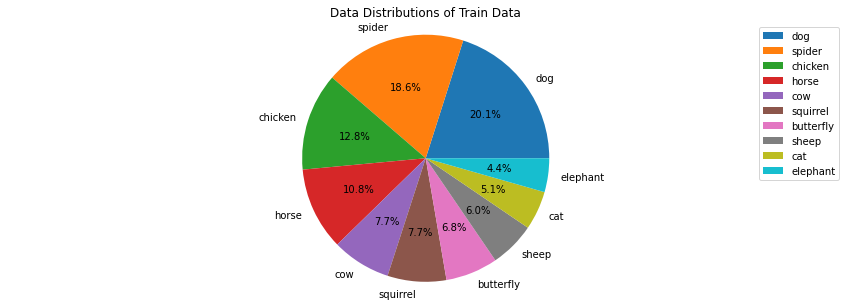

In [ ]:
plt.figure(figsize=(15,5))
plt.pie(distribution_of_train.values,labels=distribution_of_train.index,autopct='%1.1f%%')
plt.title('Data Distributions of Train Data')
plt.axis('equal')
plt.legend()
plt.show()

In [ ]:
val_image_names = pd.Series(Total_ValImages)
val_df = pd.DataFrame()

# generate Filename field
val_df['Filename'] = val_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
val_df['ClassID'] = val_image_names.map(lambda img_name: img_name.split("/")[-2])

val_df.head()

,Filename,ClassID
0,1346.jpeg,cat
1,1307.jpeg,cat
2,1794.jpeg,cat
3,826.jpeg,cat
4,1540.jpeg,cat


In [ ]:
distribution_of_validation = val_df['ClassID'].value_counts()
distribution_of_validation.head(10)

ClassID
dog          486
spider       449
chicken      309
horse        262
squirrel     186
cow          186
butterfly    164
sheep        133
cat          113
elephant     108
Name: count, dtype: int64

/var/folders/hs/v5wrwsp11s17ls2_6yx5ytkh0000gn/T/ipykernel_7551/4161997829.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab10',num)


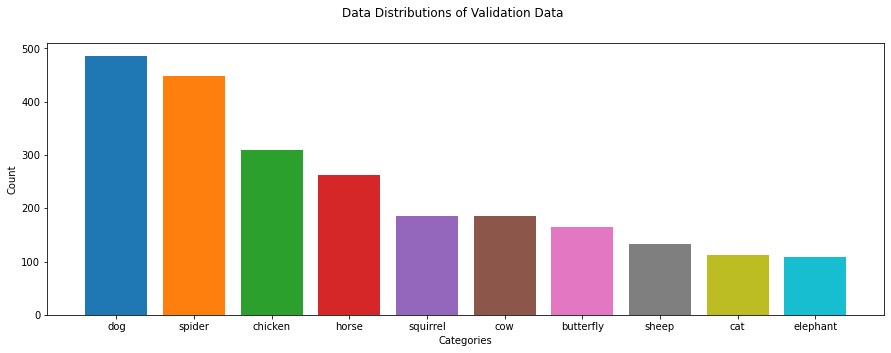

In [ ]:
plt.figure(figsize=(15,5))
num = len(distribution_of_validation)
color_palette = plt.cm.get_cmap('tab10',num)
plt.bar(distribution_of_validation.index,distribution_of_validation.values,color=color_palette(np.arange(num)))
plt.xlabel('Categories')
plt.ylabel('Count')
plt.suptitle('Data Distributions of Validation Data')
plt.show()

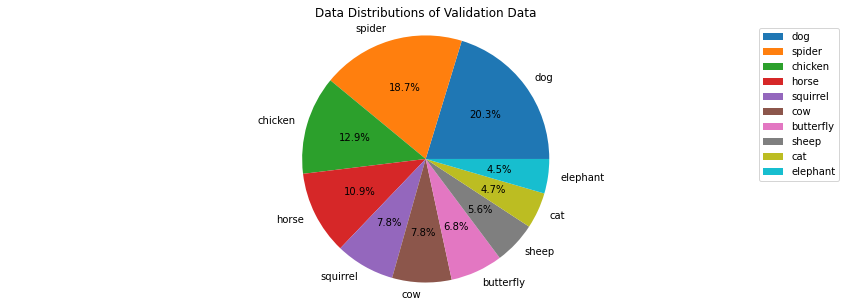

In [ ]:
plt.figure(figsize=(15,5))
plt.pie(distribution_of_validation.values,labels=distribution_of_validation.index,autopct='%1.1f%%')
plt.title('Data Distributions of Validation Data')
plt.axis('equal')
plt.legend()
plt.show()

# Display the Image

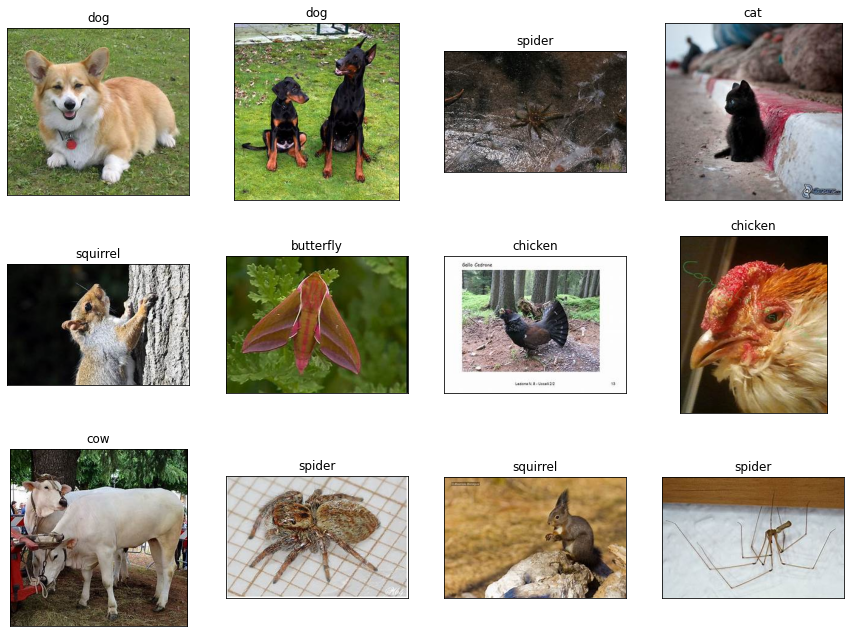

In [ ]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassID'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])

# Image DataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 20938 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.


# Building ResNet50

In [ ]:
def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)

    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 10,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)
model.summary()

In [ ]:
from tensorflow.keras.applications import ResNet50

modelT = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

In [ ]:
for layers in modelT.layers:
    layers.trainable = False

In [ ]:
from keras.layers import  Dropout
y = Flatten()(modelT.output)
y = Dropout(0.5)(y)
y = Dense(10, activation = "softmax")(y)

modelT = keras.Model(modelT.input, y)
modelT.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
modelT.summary()

In [ ]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)

In [ ]:
mc = ModelCheckpoint('/Users/liang/Desktop/Computer Vision/Final_Project/model.h5', monitor='val_accuracy', mode='max' )

In [ ]:
History = modelT.fit_generator(train_generator,validation_data=val_generator,epochs=10,verbose=1, callbacks=[mc,es])

In [ ]:
acc = History.history['accuracy']
val_acc = History.history['val_accuracy']
loss = History.history['loss']
val_loss = History.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = modelT.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0))

In [ ]:
y_val = test_generator.classes
y_pred = modelT.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:
print(classification_report(y_val,y_pred))

In [ ]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}

In [ ]:
filenames = test_generator.filenames

In [ ]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

In [ ]:
same_counts = val_df['Same'].value_counts()
print('True Prediction Counts: ',same_counts[True])
print('False Prediction Counts: ',same_counts[False])

In [ ]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_size = 224
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.

    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"/Users/liang/Desktop/Computer Vision/Final_Project/archive/raw-img/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'Actual: {temp_df.actual[i]}||Prediction: {temp_df.predicted[i]}')

In [ ]:
display_images(val_df[val_df['Same']==True])

In [ ]:
display_images(val_df[val_df['Same']!=True])

In [ ]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)

In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['dog', 'spider', 'cow', 'squirrel', 'elephant', 'sheep', 'cat', 'butterfly', 'chicken', 'horse']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Building VGG16 model

In [ ]:
batch_size = 32
img_size = 224

base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (img_size,img_size,3))

last = base_model.layers[-2].output
x = GlobalAveragePooling2D()(last)
x = Dense(512,'relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
base_model.trainable = False

for layer in base_model.layers:
    if layer.name == 'block5_conv1':
        layer.trainable = True
    if layer.name == 'block4_conv1':
        layer.trainable = True
    else:
        layer.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
add_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=base_model.output_shape[1:]), # the nn will learn the good filter to use
    tensorflow.keras.layers.Dense(512, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dropout(0.2),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

model_vgg16 = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model_vgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],)
model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
modelcheckpoint = ModelCheckpoint('/Users/liang/Desktop/Computer Vision/Final_Project/modelvgg16.h5', monitor='val_accuracy', mode='min',save_best_only = True,
                            verbose=1 )

earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.00000001)

In [ ]:
history = model_vgg16.fit(train_generator,
                    epochs=10,
                    validation_data=val_generator,
                    callbacks=[modelcheckpoint,earlystopping,learning_rate_reduction])

Epoch 1/10
